In [2]:
import numpy as np
import cvxpy as cp
from scipy.linalg import eigh
from numpy.typing import NDArray
from scipy.linalg import svd, logm, expm, qr, eig, expm
from scipy.stats import gamma
import pandas as pd
import scipy.stats as stats
import scipy.signal as signal
import seaborn as sns

# import all functions from stiefel.py
from stiefel import *

# set seed
seed = 41
np.random.seed(seed)

from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d

params = {
    # 'text.latex.preamble': ['\\usepackage{gensymb}'],
    # 'image.origin': 'lower',
    # 'image.interpolation': 'nearest',
    # 'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 13, # fontsize for x and y labels (was 10)
    'axes.titlesize': 13,
    'font.size': 13, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'text.usetex': False,
    # 'figure.figsize': [3.39, 2.10],
    'figure.figsize': [3.39, 3.39],
    'font.family': 'serif',
}
mpl.rcParams.update(params)

In [3]:
# we want to pick up 4 points on the sphere, x, y, z (including the basepoint)
base_pt = np.array([0, 0, 1])

# pick up 3 points on the surface of the sphere (excluding the basepoint) around the basepoint at a certain angle
# the angle is in radians
phi1 = 60 * np.pi / 180                  # 60 degrees: governs the angle from the y-axis (north or south pole)
phi2 = 75 * np.pi / 180
phi3 = 35 * np.pi / 180
theta1 = 0 * np.pi / 180                # 0 degrees: governs the angle in the x-y plane (aximuthal angle)
theta2 = 70 * np.pi / 180
theta3 = 240 * np.pi / 180

# phi_p = np.array([phi, phi, phi])
phi_p = np.array([phi1, phi2, phi3])
theta_p = np.array([theta1, theta2, theta3])
# the points on the sphere
x_i = np.cos(theta_p) * np.sin(phi_p)
y_i = np.sin(theta_p) * np.sin(phi_p)
z_i = np.cos(phi_p)

print("Points on the sphere:")
for i in range(3):
    # print(f"({x_i_array[i]}, {y_i_array[i]}, {z_i_array[i]})")
    print(f"({x_i[i]}, {y_i[i]}, {z_i[i]})")
    print("Radius:", np.sqrt(x_i[i] ** 2 + y_i[i] ** 2 + z_i[i] ** 2))


########################################################################################################################
# pick up 3 points on the surface of the sphere for pts_tilda
# phi_tilda = 48 * np.pi / 180
phi1_tilda = (60-12) * np.pi / 180                  # 60 degrees: governs the angle from the y-axis (north or south pole)
phi2_tilda = (75-12) * np.pi / 180
phi3_tilda = (35-12) * np.pi / 180
theta1_tilda = 0 * np.pi / 180
theta2_tilda = 70 * np.pi / 180
theta3_tilda = 240 * np.pi / 180

# phi_p_tilda = np.array([phi_tilda, phi_tilda, phi_tilda])
phi_p_tilda = np.array([phi1_tilda, phi2_tilda, phi3_tilda])
theta_p_tilda = np.array([theta1_tilda, theta2_tilda, theta3_tilda])
# the points on the sphere
x_i_tilda = np.cos(theta_p_tilda) * np.sin(phi_p_tilda)
y_i_tilda = np.sin(theta_p_tilda) * np.sin(phi_p_tilda)
z_i_tilda = np.cos(phi_p_tilda)

print("###############################################################################################################")
print("Points tilda on the sphere:")
for i in range(3):
    # print(f"({x_i_array[i]}, {y_i_array[i]}, {z_i_array[i]})")
    print(f"({x_i_tilda[i]}, {y_i_tilda[i]}, {z_i_tilda[i]})")
    print("Radius:", np.sqrt(x_i_tilda[i] ** 2 + y_i_tilda[i] ** 2 + z_i_tilda[i] ** 2))

Points on the sphere:
(0.8660254037844386, 0.0, 0.5000000000000001)
Radius: 1.0
(0.3303660895493522, 0.9076733711903686, 0.25881904510252074)
Radius: 0.9999999999999999
(-0.2867882181755233, -0.49673176489215387, 0.8191520442889918)
Radius: 0.9999999999999999
###############################################################################################################
Points tilda on the sphere:
(0.7431448254773941, 0.0, 0.6691306063588582)
Radius: 0.9999999999999999
(0.30474217910701157, 0.8372722558519101, 0.4539904997395468)
Radius: 0.9999999999999999
(-0.19536556424463702, -0.33838308332107253, 0.9205048534524404)
Radius: 1.0


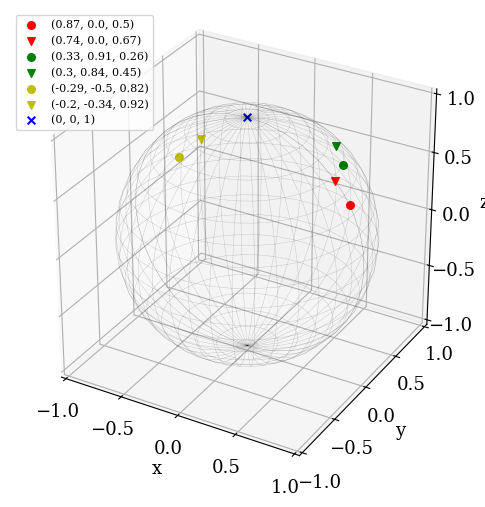

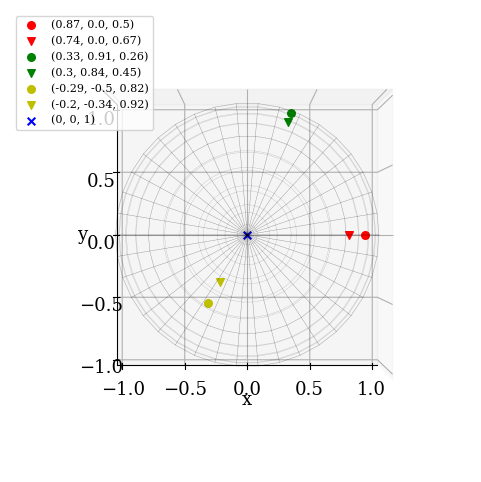

In [7]:
# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    # ax.scatter(x_i[i], y_i[i], z_i[i], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(x_i[i], 2)}, {np.round(y_i[i], 2)}, {np.round(z_i[i], 2)})")
    ax.scatter(x_i[i], y_i[i], z_i[i], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(x_i[i], 2)}, {np.round(y_i[i], 2)}, {np.round(z_i[i], 2)})")
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# plot basepoint
ax.scatter(base_pt[0], base_pt[1], base_pt[2], s=30, c='b', zorder=5, marker='x', label=f"({base_pt[0]}, {base_pt[1]}, {base_pt[2]})")
# ax.text(base_pt[0], base_pt[1], base_pt[2], f"({np.round(base_pt[0], 2)}, {np.round(base_pt[1], 2)}, {np.round(base_pt[2], 2)})", size=10, zorder=10, color='k')

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

# fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=0.3, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc = 'upper left')
# legend stating the name of the points
# set the limit of the axes to be the same
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# set ticks
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
# axis off
# ax.set_axis_off()
plt.show()

# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(x_i[i], y_i[i], z_i[i], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(x_i[i], 2)}, {np.round(y_i[i], 2)}, {np.round(z_i[i], 2)})")
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# plot basepoint
ax.scatter(base_pt[0], base_pt[1], base_pt[2], s=30, c='b', zorder=5, marker='x', label=f"({base_pt[0]}, {base_pt[1]}, {base_pt[2]})")

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=0.3, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc = 'upper left')
# set the limit of the axes to be the same
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# set ticks
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

# Set the view to top
ax.view_init(elev=90, azim=-90)
# turn off z axis
ax.set_zticks([])
ax.set_zticklabels([])
ax.set_zlabel('')

plt.show()


In [9]:
# make it an array
base_pt_array = np.array([base_pt]).flatten()             # shape: (3,) # dim : x, y, z
model_pts_array = np.vstack([x_i, y_i, z_i]).T            # shape: (N, 3)
model_tilda_pts_array = np.vstack([x_i_tilda, y_i_tilda, z_i_tilda]).T            # shape: (N, 3)
print("base_pt_array: \n", base_pt_array)
print("model_pts_array: \n", model_pts_array)
print("model_tilda_pts_array: \n", model_tilda_pts_array)

base_pt_array: 
 [0 0 1]
model_pts_array: 
 [[ 0.8660254   0.          0.5       ]
 [ 0.33036609  0.90767337  0.25881905]
 [-0.28678822 -0.49673176  0.81915204]]
model_tilda_pts_array: 
 [[ 0.74314483  0.          0.66913061]
 [ 0.30474218  0.83727226  0.4539905 ]
 [-0.19536556 -0.33838308  0.92050485]]


In [10]:
model_pts_rob = []
for i in range(3):
    model_pts_rob.append(model_pts_array[i].reshape(-1, 1))

model_pts_rob = np.array(model_pts_rob)

In [11]:
# Stiefel log of the model_pts_array with base_pt_array
model_pts_array.shape
deltas = batch_stiefel_log(base_pt_array.reshape(-1, 1), model_pts_rob, tau=1e-4)

Stiefel log converged after 0 iterations.
Stiefel log converged after 0 iterations.
Stiefel log converged after 0 iterations.


angle:  [1.22173048 2.96705973 0.        ]


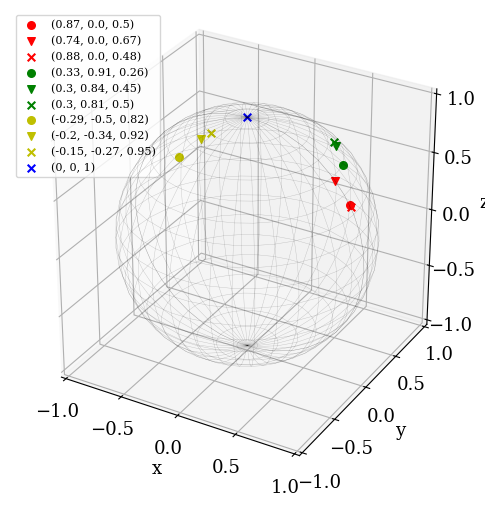

In [12]:
# compute angle between the tangent vectors
angle = np.zeros(3)
for i in range(3-1):
    # cosine of the angle is the frobenius inner product of the tangent vectors divided by the product of their norms
    cos_angle = np.trace(deltas[i].T @ deltas[i + 1]) / (np.linalg.norm(deltas[i], ord='fro') * np.linalg.norm(deltas[i + 1], ord='fro'))
    angle[i] = np.arccos(cos_angle)

print("angle: ", angle)

# generate the tangent vectors based on new angle
deltas_new = []
new_angles = np.array([30, 40, 50, 60]) * np.pi / 180
for i in range(4-1):
    # generate the tangent vectors based on new angle
    delta_new = deltas[i] * np.arccos(new_angles[i])
    deltas_new.append(delta_new)
    
# compute the new points on the sphere by exponentiating the tangent vectors
model_pts_new = []
for i in range(4-1):
    model_pt_new = stiefel_exp(base_pt_array.reshape(-1, 1), deltas_new[i])
    model_pts_new.append(model_pt_new)

model_pts_new = np.array(model_pts_new).reshape(3, 3)

# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(x_i[i], y_i[i], z_i[i], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(x_i[i], 2)}, {np.round(y_i[i], 2)}, {np.round(z_i[i], 2)})")
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
    ax.scatter(model_pts_new[i, 0], model_pts_new[i, 1], model_pts_new[i, 2], s=30, c=C[i], zorder=5, marker='x', label=f"({np.round(model_pts_new[i, 0], 2)}, {np.round(model_pts_new[i, 1], 2)}, {np.round(model_pts_new[i, 2], 2)})")
    
# plot basepoint
ax.scatter(base_pt[0], base_pt[1], base_pt[2], s=30, c='b', zorder=5, marker='x', label=f"({base_pt[0]}, {base_pt[1]}, {base_pt[2]})")

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=0.3, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc = 'upper left')
# set the limit of the axes to be the same
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# set ticks
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

# # Set the view to top
# ax.view_init(elev=90, azim=-90)
# # turn off z axis
# ax.set_zticks([])
# ax.set_zticklabels([])
# ax.set_zlabel('')
plt.show()



In [13]:
model_pts_rob[0].T @ model_pts_rob[0]

array([[1.]])

In [77]:
def make_orthogonal_euclidean(X, Y):
    """
    Adjust Y to make it orthogonal to X in the Frobenius inner product sense.
    """
    # Calculate the projection of Y onto X
    projection = (np.trace(X.T @ Y) / np.trace(X.T @ X)) * X
    
    # Subtract the projection from Y to get the component orthogonal to X
    Y_orthogonal = Y - projection
    
    return Y_orthogonal


def canonical_metric(U0, X, Y):
    """
    Compute the canonical metric between two tangent vectors X and Y.
    """
    return np.trace(X.T @ (np.eye(X.shape[0]) - 0.5 * U0 @ U0.T) @ Y)


def make_orthogonal_stiefelcanonical(U0, X, Y):
    """
    Adjust Y to make it orthogonal to X in the Stiefel canonical inner product sense.
    """
    # Calculate the projection of Y onto X
    projection = canonical_metric(U0, X, Y) / canonical_metric(U0, X, X) * X
    
    # Subtract the projection from Y to get the component orthogonal to X
    Y_orthogonal = Y - projection
    
    return Y_orthogonal

[[1.]]
[[1.]]


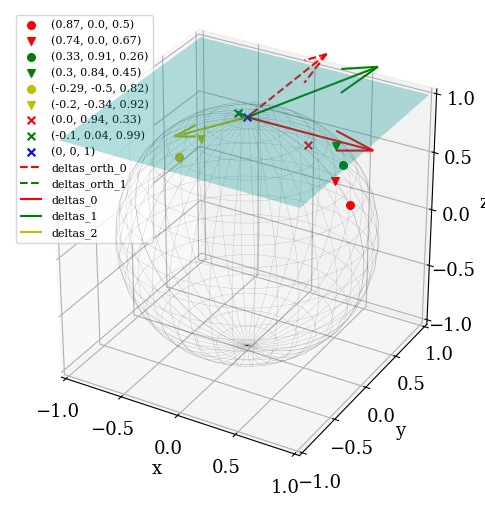

In [79]:


# make the tangent vectors orthogonal
deltas_orthogonal = []
for i in range(3-1):
    delta_orthogonal = make_orthogonal_stiefelcanonical(deltas[i], deltas[i + 1])
    deltas_orthogonal.append(delta_orthogonal)
    
# compute the new points on the sphere by exponentiating the tangent vectors
model_pts_new_orthogonal = []
for i in range(3-1):
    model_pt_new_orthogonal = stiefel_exp(base_pt_array.reshape(-1, 1), deltas_orthogonal[i])
    model_pts_new_orthogonal.append(model_pt_new_orthogonal)
    
model_pts_new_orthogonal = np.array(model_pts_new_orthogonal).reshape(2, 3)

# verify that the new model points lie on the Stiefel manifold
for i in range(3-1):
    print(model_pts_new_orthogonal[i].reshape(-1, 1).T @ model_pts_new_orthogonal[i].reshape(-1, 1))

# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(x_i[i], y_i[i], z_i[i], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(x_i[i], 2)}, {np.round(y_i[i], 2)}, {np.round(z_i[i], 2)})")
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")

for i in range(3-1):    
    ax.scatter(model_pts_new_orthogonal[i, 0], model_pts_new_orthogonal[i, 1], model_pts_new_orthogonal[i, 2], s=30, c=C[i], zorder=5, marker='x', label=f"({np.round(model_pts_new_orthogonal[i, 0], 2)}, {np.round(model_pts_new_orthogonal[i, 1], 2)}, {np.round(model_pts_new_orthogonal[i, 2], 2)})")
    
# plot basepoint
ax.scatter(base_pt[0], base_pt[1], base_pt[2], s=30, c='b', zorder=5, marker='x', label=f"({base_pt[0]}, {base_pt[1]}, {base_pt[2]})")

# Plot a flat plane on top of the sphere
plane_z = 1  # Constant z value for the plane
x = np.linspace(-1, 1, 50)  # x values
y = np.linspace(-1, 1, 50)  # y values
X, Y = np.meshgrid(x, y)  # Create a meshgrid for X and Y
Z = np.full_like(X, plane_z)  # Create an array of the same shape as X and Y filled with the z value

# scatter the delta vectors
for i in range(3-1):
    ax.quiver(0, 0, 1, deltas_orthogonal[i][0], deltas_orthogonal[i][1], deltas_orthogonal[i][2], color=C[i], label=f"deltas_orth_{i}", ls='dashed')
    
for i in range(3):
    ax.quiver(0, 0, 1, deltas[i][0], deltas[i][1], deltas[i][2], color=C[i], label=f"deltas_{i}")

# Plot the plane
ax.plot_surface(X, Y, Z, alpha=0.3, color='c')

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=0.3, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc = 'upper left')
# set the limit of the axes to be the same
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# set ticks
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

# Set the view to top
# ax.view_init(elev=90, azim=-90)
# # turn off z axis
# ax.set_zticks([])
# ax.set_zticklabels([])
# ax.set_zlabel('')
plt.show()
    

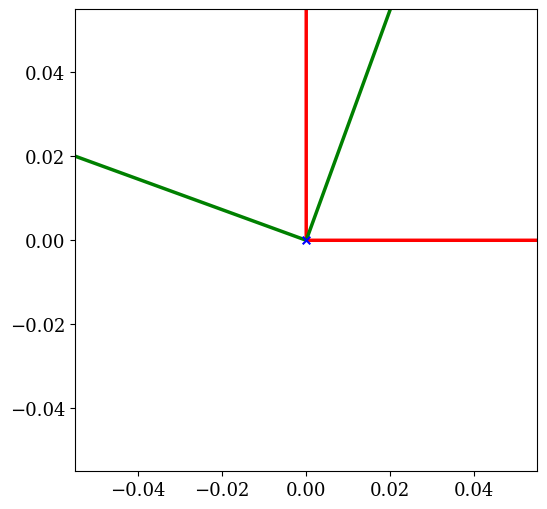

In [80]:
deltas_orthogonal = np.array(deltas_orthogonal)

# visualize the tangent vectors on a plane
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect="equal")
C = ['r', 'g', 'y']

for i in range(3-1):
    ax.quiver(0, 0, deltas_orthogonal[i][0, 0], deltas_orthogonal[i][1, 0], angles='xy', scale_units='xy', scale=1, color=C[i], label=f"({np.round(deltas_orthogonal[i][0, 0], 2)}, {np.round(deltas_orthogonal[i][1, 0], 2)})")
    ax.quiver(0, 0, deltas[i][0, 0], deltas[i][1, 0], angles='xy', scale_units='xy', scale=1, color=C[i], label=f"({np.round(deltas[i][0, 0], 2)}, {np.round(deltas[i][1, 0], 2)})")     
    
# plot basepoint
ax.scatter(base_pt[0], base_pt[1], s=30, c='b', zorder=5, marker='x', label=f"({base_pt[0]}, {base_pt[1]})")

# autoscale to make sure everything fits

# set the limit of the axes to be the same
# ax.set_xlim([-1, 1])
# ax.set_ylim([-1, 1])
# set ticks
# ax.set_xticks([-1, -0.5, 0, 0.5, 1])
# ax.set_yticks([-1, -0.5, 0, 0.5, 1])
plt.show()

In [71]:
def frobenius_inner_product(A, B):
    """Calculate the Frobenius inner product of two matrices."""
    return np.trace(A.T @ B)

def frobenius_norm(A):
    """Calculate the Frobenius norm of a matrix."""
    return np.sqrt(frobenius_inner_product(A, A))

def angle_between_tangent_vectors(X, Y):
    """Calculate the angle between two tangent vectors on the Stiefel manifold."""
    cos_theta = frobenius_inner_product(X, Y) / (frobenius_norm(X) * frobenius_norm(Y))
    # Ensure cos_theta is within the valid range for arccos due to numerical issues
    cos_theta = np.clip(cos_theta, -1, 1)
    theta = np.arccos(cos_theta)
    return np.degrees(theta)  # Return the angle in degrees

# compute the angle between the orthogonal tangent vectors and the original tangent vectors
for i in range(3-1):
    angle = angle_between_tangent_vectors(deltas_orthogonal[i], deltas[i])
    print(f"Angle between orthogonal tangent vector {i} and original tangent vector {i}: {angle:.2f} degrees")

Angle between orthogonal tangent vector 0 and original tangent vector 0: 90.00 degrees
Angle between orthogonal tangent vector 1 and original tangent vector 1: 90.00 degrees


In [72]:
# calculate length of the tangent vectors
lengths = np.array([frobenius_norm(delta) for delta in deltas])
print("Lengths of the tangent vectors:", lengths)

# calculate the length of the orthogonal tangent vectors
lengths_orthogonal = np.array([frobenius_norm(delta) for delta in deltas_orthogonal])
print("Lengths of the orthogonal tangent vectors:", lengths_orthogonal)

Lengths of the tangent vectors: [1.04719755 1.30899694 0.61086524]
Lengths of the orthogonal tangent vectors: [1.23005476 0.10607564]
